# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# Difference in stock price
df['Diff'] = df['Adj Close'].diff().shift(-1)

# Target up or down
df['Target'] = np.sign(df['Diff'])

# Option Premium
df['Premium'] = .08 * df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [10]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [11]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [12]:
df['Predictions'] = y_pred

In [13]:
df['Profits'] = 0.

# True Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), 'Profits'] = df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), 'Premium']

# False Positives
df.loc[(df['Predictions'] == 1) & (df['Target'] == -1), 'Profits'] = 100 * df['Diff'] + df['Premium']

# 5.) Plot profits over time

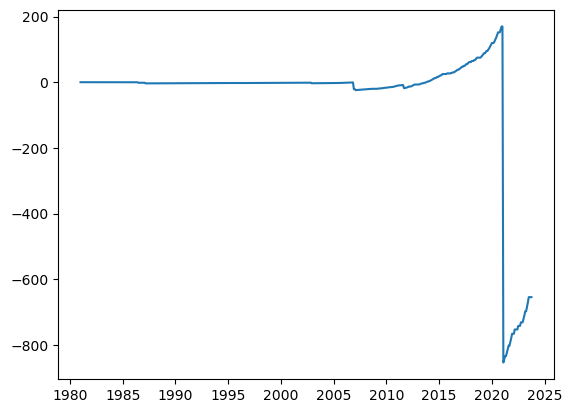

In [15]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

* 5.5) My ability from the MQE to help Mr. Liu's Ventures could be forecast and moniter data.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.